dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

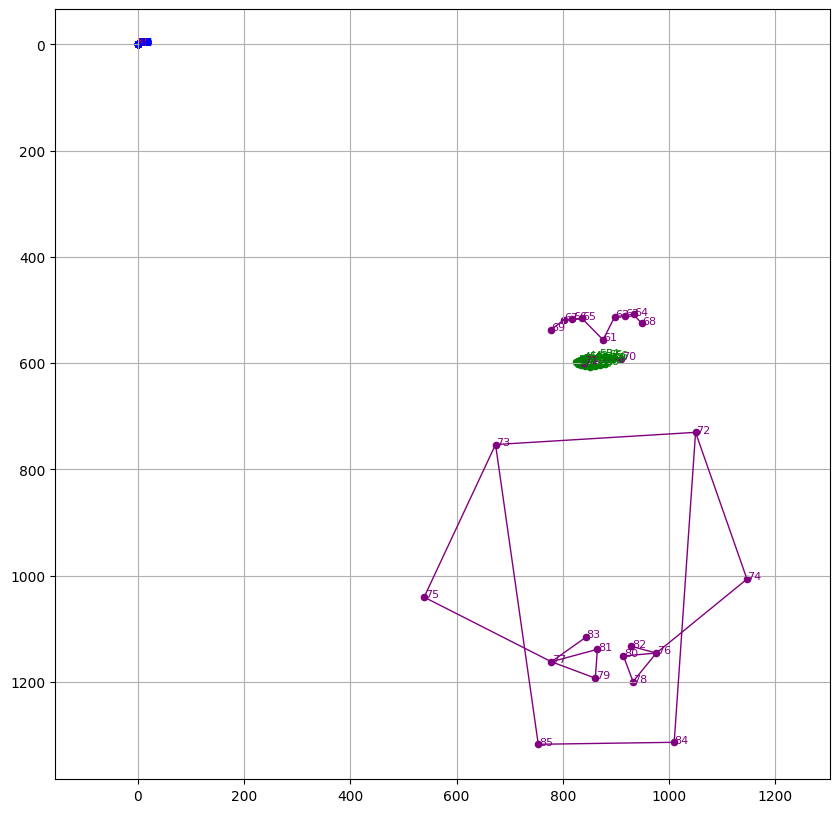

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# # Load the pickle file
# with open('/data/sharedData/pose_data_isharah2000_hands_lips_body.pkl', 'rb') as f:
#     data_dict = pickle.load(f)

# # Load the pickle file (Task-1)
# with open('/home/cpami-llm/CPAMI_WorkPlace/Rezwan/MSLR-2025/public_si_dat/pose_data_isharah1000_hands_lips_body_May12.pkl', 'rb') as f:
#     data_dict = pickle.load(f)

# # Load the pickle file (Task-2)
# with open('/home/cpami-llm/CPAMI_WorkPlace/Rezwan/MSLR-2025/MSLR-Pose86K-CSLR-Isharah/data/public_us_dat/pose_data_isharah1000_hands_lips_body_May12.pkl', 'rb') as f:
#     data_dict = pickle.load(f)

with open('/home/cpami-llm/CPAMI_WorkPlace/Rezwan/MSLR-2025/MSLR-Pose86K-CSLR-Isharah/data/public_us_dat/pose_data_isharah1000_US_test/pose_data_isharah1000_US_test.pkl', 'rb') as f:
    data_dict = pickle.load(f)


print(data_dict.keys())

print(f"Loaded data with {len(data_dict)} samples.")
print(f"Sample keys: {list(data_dict.keys())[5:15]}")  # Print first 5 sample keys

# Choose a sample
sample_key = list(data_dict.keys())[0]
keypoints = data_dict[sample_key]['keypoints']  # shape (T, J, 2)
frame = keypoints[0]

# Get parts: rh, lh, lips, body
NUM_LIPS = 19  # after deduplication
rh = frame[0:21]
lh = frame[21:42]
lips = frame[42:42+NUM_LIPS]
body = frame[42+NUM_LIPS:]

# Combine all parts into a single array for index referencing
combined = np.concatenate([rh, lh, lips, body], axis=0)

# Define offsets for drawing connections using correct indices
rh_offset = 0
lh_offset = 21
lips_offset = 42
body_offset = 42 + NUM_LIPS

# Plot setup
plt.figure(figsize=(10, 10))
ax = plt.gca()

def draw_connections(part, connections, offset, color):
    for conn in connections:
        start_idx, end_idx = conn
        start = offset + start_idx
        end = offset + end_idx
        if start < len(combined) and end < len(combined):
            x1, y1 = combined[start]
            x2, y2 = combined[end]
            plt.plot([x1, x2], [y1, y2], color=color, linewidth=1)

def draw_points(part, offset, color):
    for i, (x, y) in enumerate(part):
        global_idx = offset + i
        plt.scatter(x, y, color=color, s=20)
        plt.text(x + 1, y + 1, str(global_idx), fontsize=8, color=color)

# Draw each component
draw_connections(rh, mp.solutions.hands.HAND_CONNECTIONS, rh_offset, 'red')
draw_connections(lh, mp.solutions.hands.HAND_CONNECTIONS, lh_offset, 'blue')
# draw_connections(lips, mp.solutions.face_mesh.FACEMESH_LIPS, lips_offset, 'green')
draw_connections(body, mp.solutions.holistic.POSE_CONNECTIONS, body_offset, 'purple')

draw_points(rh, rh_offset, 'red')
draw_points(lh, lh_offset, 'blue')
draw_points(lips, lips_offset, 'green')
draw_points(body, body_offset, 'purple')

#plt.title(f'Frame Visualization with Keypoint Indices\n{sample_key}')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.grid(True)
plt.show()
